# Project Python Foundations: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [5]:
# to not display any waring 
import warnings
warnings.filterwarnings('ignore')

# to import libraries for data manipulation
import numpy as np
import pandas as pd

# to import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True) # to add a nice background to the graphs
%matplotlib inline 
#to tell python to display the graphs

### Understanding the structure of the data

In [6]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** Write the code to check the shape of the dataset and write your observations based on that. (0.5 mark)

In [3]:
# write your code here
df.shape

(1898, 9)


#### Observations:
The dataset has 1898 rows, which is 1898 observations and 9 colunms, which is 9 variables. 

### Question 2: Write the observations based on the below output from the info() method. (0.5 mark)

In [4]:
# use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
* All columns have 1898 observations.
* No missing information
* The data types are 1 float, 4 ints64, and 4 objects.
* Restaurant_name, cuisine_type, and day_of_the_week have dtypes as object but they should be categorical variables. 
* Rating is under object dtype. It would need to be changed to int64 to make it easy for future analysis.

### Question 3: 'restaurant_name', 'cuisine_type', 'day_of_the_week' are object types. Write the code to convert the mentioned features to 'category' and write your observations on the same. (0.5 mark)

In [5]:
# to convert 'restaurant_name', 'cuisine_type', 'day_of_the_week' into categorical dtype.

df['restaurant_name']= df.restaurant_name.astype('category')
df['cuisine_type']= df.cuisine_type.astype('category')
df['day_of_the_week']= df.day_of_the_week.astype('category')

# use info() to check if the change above works
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


#### Observations:
* Now restaurant name, cuisine type, and date of the week are category dtype.

### **Question 4:** Write the code to find the summary statistics and write your observations based on that. (1 mark)

In [10]:
# write your code here
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [11]:
pd.isnull(df).sum() #to check if there is any missing information

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
* In 1898 observations, the average cost of the order is around 16.50 dollars, the minimum is 4.47 dollars, and the maximun is 35.41 dollars. 
* The range of cost of the order is 4.47 dollars to 35.41 dollars which is 30.94 dollars different.
* The average of food prep time is around 27 mins, min is 20 mins, and max is 35 mins which is 15 minutes different.
* The average delivery time is 24 mins, min 15 mins, and max is 33 mins which is 18 minutes different.
* There is no missing information

### **Question 5:** How many orders are not rated? (0.5 mark)

In [23]:
#to count how many of each rating in the dataset
df.value_counts('rating')

rating
Not given    736
5            588
4            386
3            188
dtype: int64

#### Observations:
* In this dataset, there are 4 types of rating, 3, 4, 5, and Not given.
* Not given has the higher number of rating counts which is 736. 
* 5 is the second highest, which is 588 and follow with 4, which is 386.
* 3 is the lowest number of voting counts, which is 188.
* Therefore, 736 orders are not rated. 
* Should explore more about those orders that received 'Not given'.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on the distributions of all the relevant variables in the dataset. (5 marks)

In [14]:
# to have an overview of customer ID in this dataset
sns.distplot(df['customer_id']);
# For histogram
     ax_hist2.axvline(
        data[feature].mean(), color="yellow", linestyle="-"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="--"
    )  # Add median to the histogram

IndentationError: unexpected indent (<ipython-input-14-dda08112dc33>, line 4)

#### Observations:
* Customer IDs in this dataset, the number IDs range from 0 to 400000.
* Customer IDs range 50000 to 150000 have presented the most in this dataset.
* Should explore which customer ids ordered more than once? Any repeat customers?

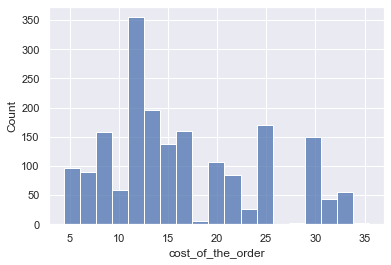

In [25]:
# to view on how much for each order cutomers like to order
sns.histplot(df['cost_of_the_order']);

#### Observation
* Customers like to order around 12-14 dollars the most. Follow by 13 dollars, 25 dollars, amd 30 dollars.
* No order in the range of 26-29 dollars.
* The least amount of order is 17-19 dollars.
* We could look into more how to improve the amount of total bill in each order.
* How to maintenance or improve customer experience whom order the in the range 12-14 dollars.

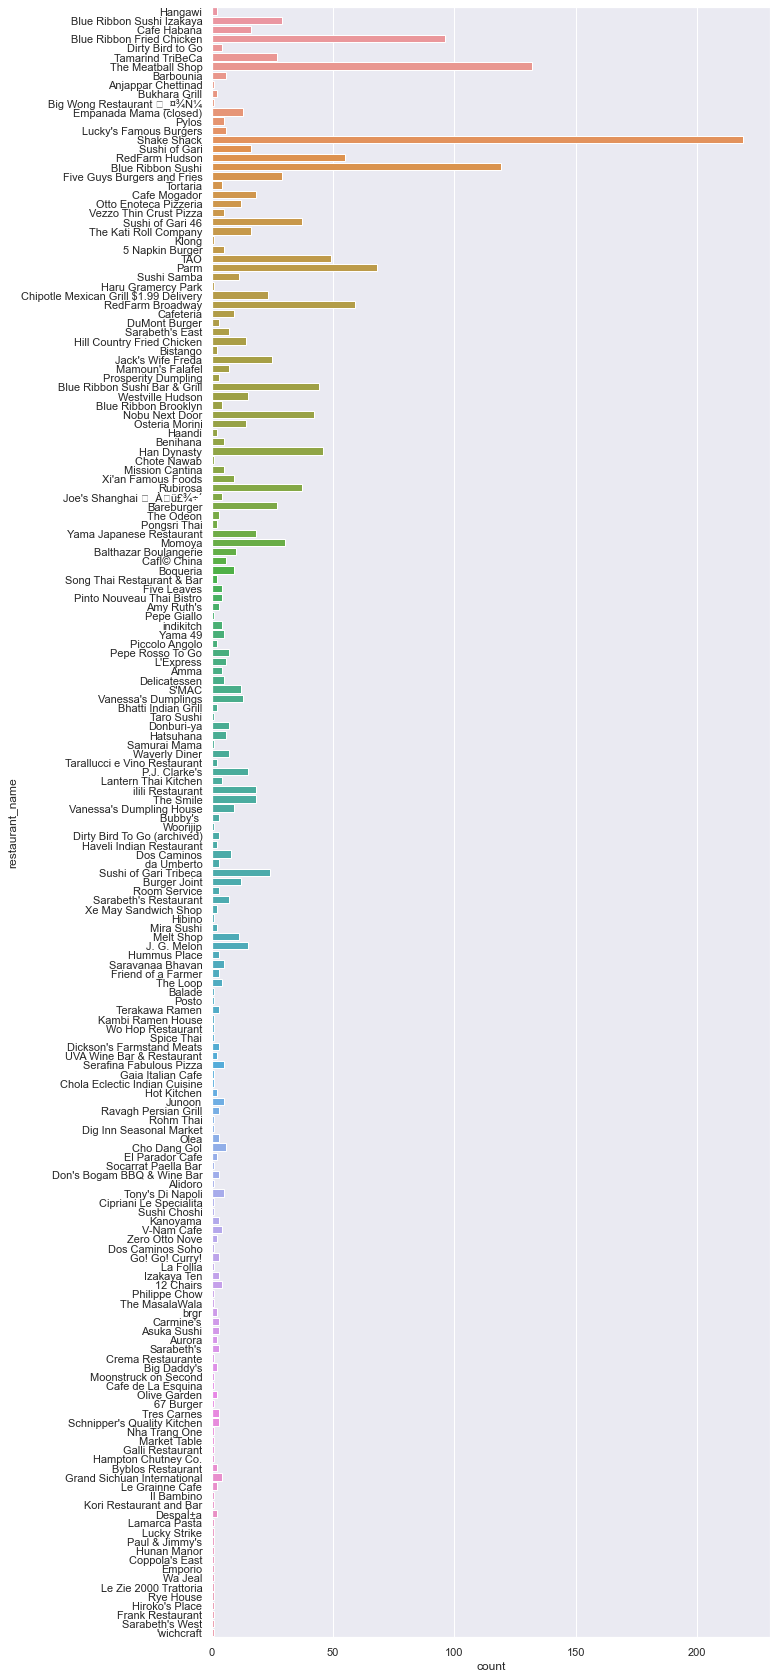

In [7]:
plt.figure(figsize=(10,30))  # setting the figure size
sns.countplot(y="restaurant_name", data=df)
plt.savefig("output.jpg", bbox_inches ='tight')

#### Observation 
* There is a few resturants have a significant high number of orders, especially the highest one. 
* The highest number of orders is Shake Shake, follow by The Meatball Shop, Blue Ribbon Sushi, and Blue Ribbon Chicken in that order.
* Should find out if any variables correlation with have high number of orders. to improve the customer and restuarant experience. 

In [27]:
df.value_counts(['cuisine_type'])

cuisine_type  
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
dtype: int64

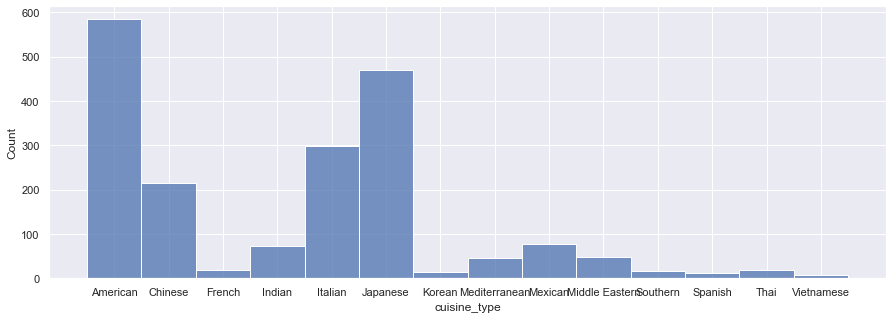

In [28]:
plt.figure(figsize=(15,5))  # setting the figure size
sns.histplot(df['cuisine_type']);

#### Observation
* Top 5 cuirsine types in this dataset are American, Japanese, Italian, Chinese, and Maxican.
* From the 5ft, Maxican, to the rest have very small amount of order comparing to the top 4.
* Need to observe between top restuarant and top cuisine types to see if they corrirate. 

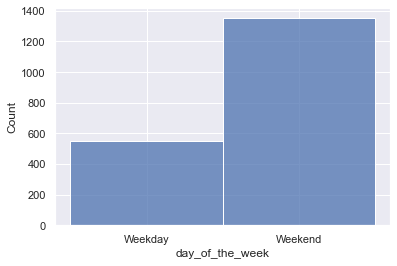

In [29]:
sns.histplot(df['day_of_the_week']);

#### Observation
* weekend orders are more than twice that of weekday

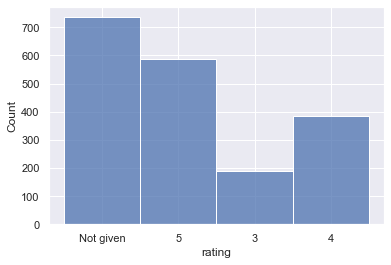

In [30]:
sns.histplot(df['rating']);

#### Observation
* There are 4 types of ranting in this dataset. There are, Not Given,5 , 3, and 4.
* The highest numbers of rating is Not Given, then 5, 4, and 3. 
* For further discovery, how to decrease Not Given rating so the company could figure out if customers are satisfied. If they are not, we can figure out how to improve the experience.
* Would need to discover the relationship of customer id, rating, order time, and delivery time.

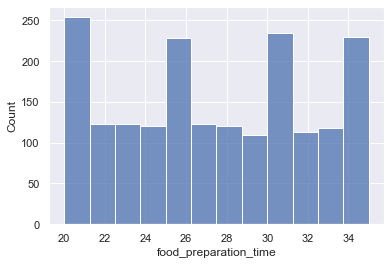

In [31]:
sns.histplot(df['food_preparation_time']);

#### Observation
* In this dataset, it took at lest 20 minutes to prepare for each order.
* The maximum time to prepare for orders is around 35 minutes.
* The top 4 counts of food preparation time is around 21 mins, then 31 mins, 26 mins, and 35 mins.
* The counts of those top 4 are in the similar height.
* Can explore more if any variable correlates with preperation time

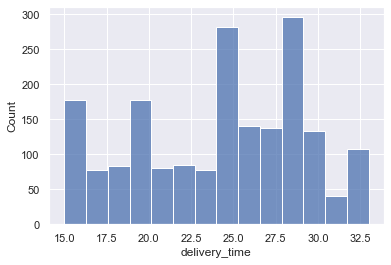

In [32]:
sns.histplot(df['delivery_time']);

#### Observations:
* In this dataset, delivery time around 28 minutes has the most counts.
* The secound is 25 minutes, the 15 minutes and 20 minutes.
* The rest of delivery time are speacing out.
* The lest count of delivery time is around 31 minutes.

### Question 7: Write the code to find the top 5 restaurants that have received the highest number of orders. (1 mark)

In [33]:
# write the code here
rank = df.value_counts(['restaurant_name'])
rank.head() # result top 5 restaurants

restaurant_name          
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
dtype: int64

#### Observations:
* The top restaurant is Shake Shake with 219 orders. The number of orders is almost 100 orders more than the second restaurant, The Meatshop.
* The second, The Meatshop with 132 orders, and the third, Blue Ribbon Sushi with 119 orders. 
* The fourth is Blue Ribbon Fried Chicken at 96 orders.
* The fifth is Parm with 68 orders.

### Question 8: Write the code to find the most popular cuisine on weekends. (1 mark)

In [34]:
df.groupby(['restaurant_name'])['day_of_the_week'].value_counts().sort_values(ascending=False).head(1)

restaurant_name  day_of_the_week
Shake Shack      Weekend            145
Name: day_of_the_week, dtype: int64

#### Observations:
* Shake Shake it is the most popular on the weekend with 145 orders. 

### Question 9: Write the code to find the number of total orders where the cost is above 20 dollars. What is the percentage of such orders in the dataset?  (1 mark)

In [35]:
len(df[(df['cost_of_the_order'] > 20)])# to find the total number of orders that is more than 20 dollars

555

In [36]:
#to find percentage by the total number of orders that is more than 20 dollars divide by total orders. 
#Then multiple the result with 100

quotient = len(df[(df['cost_of_the_order'] > 20)]) / (len(df['cost_of_the_order'])) 
percent = quotient * 100

print(percent)
round(percent,2) # to round float to two decimals. 

29.24130663856691


29.24

#### Observations:
* There are 555 orders that the cost is above 20 dollars.
* The order that the cost is above 20 dollars is 29.24% from all orders.
* From this info, 70% of orders is less than 20 dollars.

### Question 10: Write the code to find the mean delivery time based on this dataset. (1 mark)

In [37]:
# write the code here
ave_dt = df['delivery_time'].mean() #to find the mean of delivery time for all order
print(ave_dt)
round(ave_dt,2)

24.161749209694417


24.16

#### Observations:
* On average it takes 24 minutes to delivery from the restaurant to the customer's.

### Question 11: Suppose the company has decided to give a free coupon of 15 dollars to the customer who has spent the maximum amount on a single order. Write the code to find the ID of the customer along with the order details. (1 mark)

In [38]:
df.groupby(['customer_id'])['cost_of_the_order'].max().sort_values(ascending=False).head(1)

customer_id
62359    35.41
Name: cost_of_the_order, dtype: float64

#### Observations:
* The customer id 62359 has ordered the maximum amount on a single order as 35.41 dollars.

### Multivariate Analysis

### Question 12: Perform bivariate/multivariate analysis to explore relationships between the important variables in the dataset. (7 marks)

In [39]:
#to create a new DataFrame to make sure it won't effect the original DataFrame
new_df = df.copy()

In [40]:
# convert 'Not given' to null as Int dtype
new_df.rating = pd.to_numeric(new_df.rating, errors='coerce').astype('Int64')
new_df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,<NA>,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,<NA>,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [41]:
#to convert <NA> to number 0 so we can analyze more.
new_df['rating'] = new_df['rating'].replace(np.nan, 0)
new_df1 = new_df.copy()
new_df1.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,0,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,0,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [42]:
new_df1.info() #to check dtype on rating. Now it is int.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   Int64   
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: Int64(1), category(3), float64(1), int64(4)
memory usage: 104.6 KB


## Corrolation

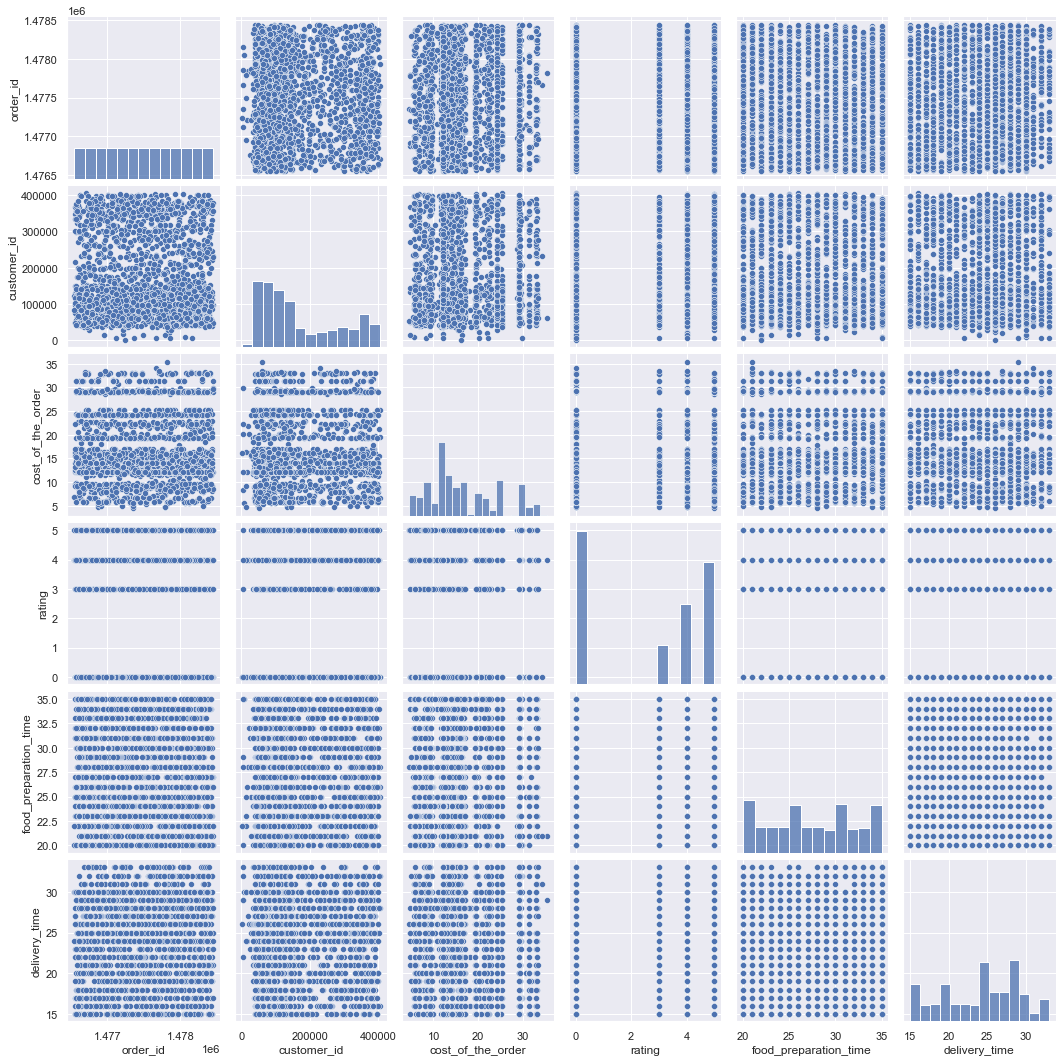

In [43]:
# to create a pairplot for multivariate analysis for any correlation. 
# Note that 'Not given' has converted it to 0 so it will show on the graph.
sns.pairplot(new_df1)

#### Observations:
* Rating does not have any correlation to cost of the order, total delivery time.
* Data of cost of the order spreadouts out through total delivery time and customer id.
* Over all, there is no significant correlation between order id, customer id, cost of order, rating, food preperation time, and delivery time.

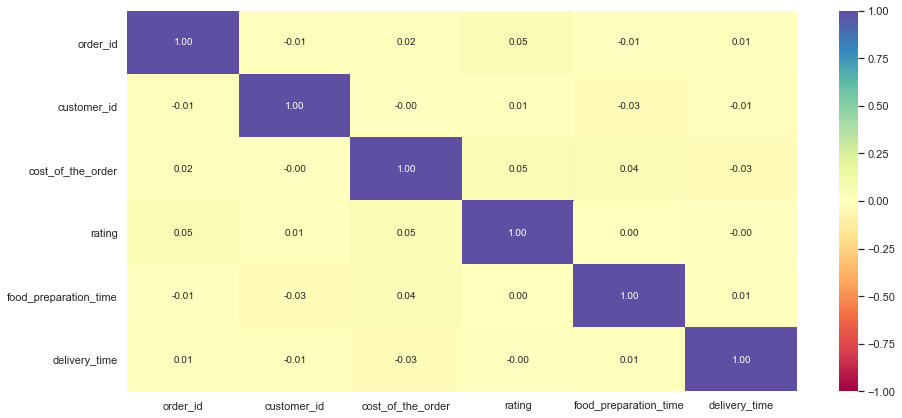

In [46]:
# To double check for correlation among numerical variables by using heatmap

num_var = ['order_id','customer_id','cost_of_the_order','rating','food_preparation_time', 'delivery_time']

corr_num_var = new_df1[num_var].corr()

# plot the heatmap

plt.figure(figsize=(15, 7))
sns.heatmap(corr_num_var, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral", xticklabels=corr_num_var.columns, yticklabels=corr_num_var.columns)
plt.show()

#### Observations:
* The graph shows the same insights as from the correlation plot
* Over all, there is no significant correlation of customer experience(rating) with cost of order, order id, customer id, food preperation time, and delivery time.
* Need to use different types of graph for a deeper analysis.

### Relationship between customer experience(rating) and other type of variables

<AxesSubplot:xlabel='rating', ylabel='restaurant_name'>

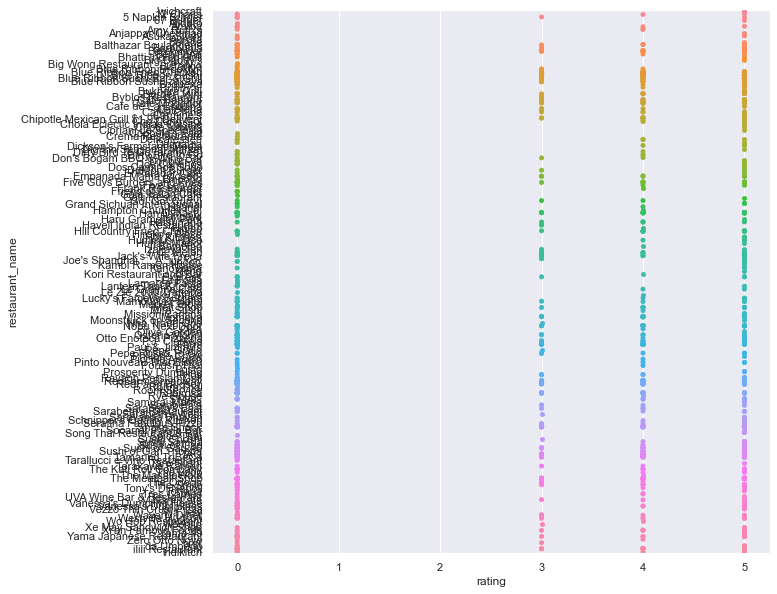

In [394]:
# how to get to top 25 restaurant? Need a new dataframe with names, food type, rating
plt.figure(figsize=(10,10))  # setting the figure size
sns.stripplot(data=new_df1, x ='rating', y= 'restaurant_name', jitter=True) # note that rating 0 is 'Not given'

It seems that most restaurants did not receive ratings from customers.

<AxesSubplot:xlabel='day_of_the_week', ylabel='restaurant_name'>

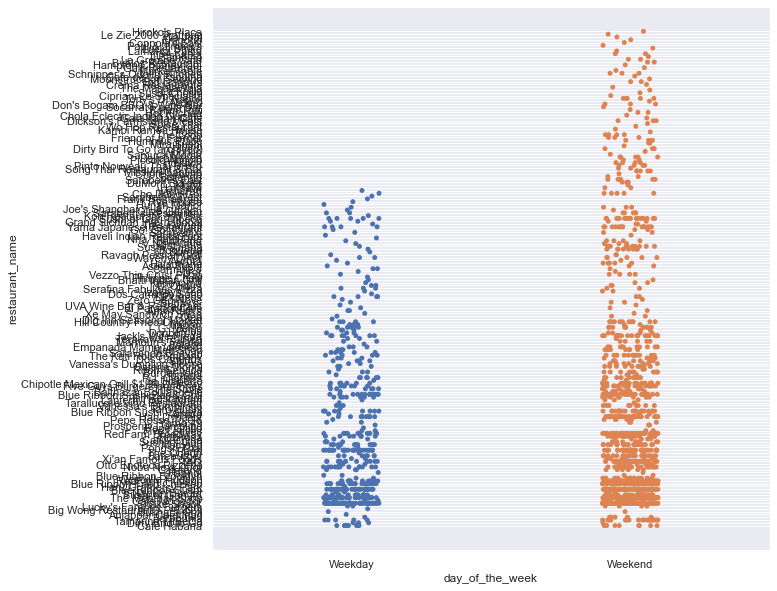

In [393]:
#day of the week vs restaurant 
plt.figure(figsize=(10,10))  # setting the figure size
sns.stripplot(data=new_df1, x='day_of_the_week', y = 'restaurant_name', jitter = True)

Weekend has more orders than weekdays

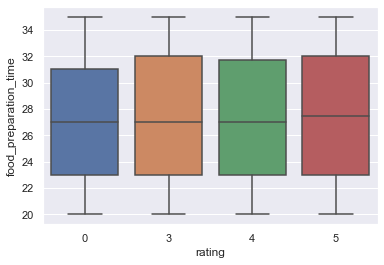

In [377]:
## to see the relationship between food preparation time and rating
sns.boxplot(data=new_df1, x = 'rating', y = 'food_preparation_time');

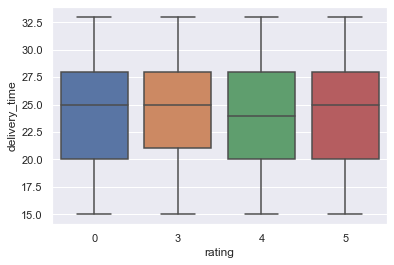

In [378]:
# to see the relationship between delievery time and rating
sns.boxplot(data=new_df1, x = 'rating', y = 'delivery_time');

There is not much different in rating for different delivery times as well.

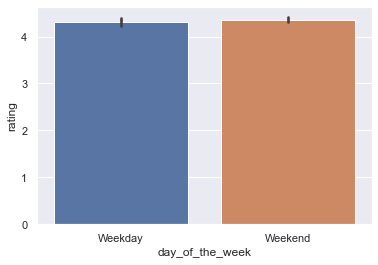

In [381]:
# day of the week and rating
sns.barplot(data = df, x = 'day_of_the_week', y = 'rating');

Overall, weekday and weekend have similar ratings which is above 4.

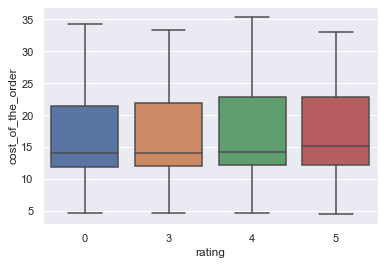

In [389]:
# day of the week and rating
sns.boxplot(data=new_df1, x = 'rating', y = 'cost_of_the_order');

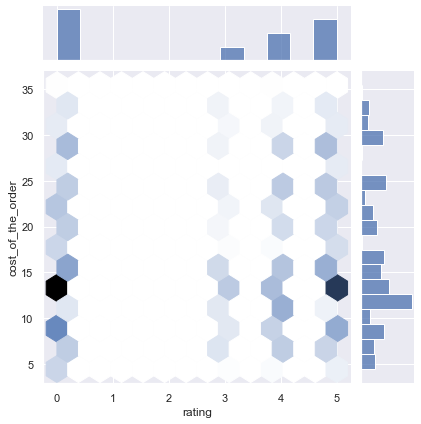

In [391]:
sns.jointplot(data = new_df1, x ='rating', y = 'cost_of_the_order', kind="hex");

It seems that customers, who ordered food around 12-14 dollars, did not give rating and gave 5 rating. 

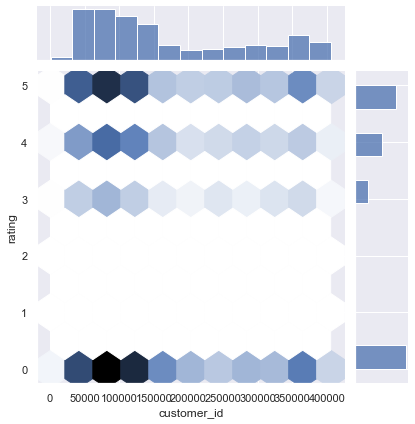

In [397]:
#id and cost_of_the_order
sns.jointplot(data = new_df1, x ='customer_id', y = 'rating', kind="hex");

Customer ids in range 50000 to 150000 provided most of rating. It seems that the highest rating is 'Not given' give 5 rating

### Question 13: Suppose the company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Write the code to find the restaurants fulfilling the criteria to get the promotional offer. (2 marks)

In [47]:
new_df1 #to result of the DataFrame that convert rating 'Not given' to 0

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,0,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,0,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,0,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


In [48]:
#to find averate for each restaurant
ave_rating = new_df1.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False).reset_index()
ave_rating

,restaurant_name,rating
0,'wichcraft,5.0
1,Philippe Chow,5.0
2,Bukhara Grill,5.0
3,Kambi Ramen House,5.0
4,Hunan Manor,5.0
...,...,...
173,Market Table,0.0
174,Paul & Jimmy's,0.0
175,Posto,0.0
176,Room Service,0.0


In [49]:
#to change column'rating' to 'ave_rating'
ave_rating=ave_rating.rename(columns={'rating':'ave_rating'})
ave_rating

,restaurant_name,ave_rating
0,'wichcraft,5.0
1,Philippe Chow,5.0
2,Bukhara Grill,5.0
3,Kambi Ramen House,5.0
4,Hunan Manor,5.0
...,...,...
173,Market Table,0.0
174,Paul & Jimmy's,0.0
175,Posto,0.0
176,Room Service,0.0


In [50]:
count = new_df.groupby(['restaurant_name'])['rating'].count().sort_values(ascending=False).reset_index()
count.head()

,restaurant_name,rating
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


In [265]:
#to change column'rating' to 'rating_count'
count = count.rename(columns={'rating':'rating_count'})
count.head()

,restaurant_name,rating_count
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [266]:
pd.unique(count['rating_count'])

array([133,  84,  73,  64,  41,  39,  34,  28,  24,  23,  22,  20,  19,
        18,  17,  15,  13,  12,  11,  10,   9,   8,   7,   6,   5,   4,
         3,   2,   1,   0])

In [267]:
# Merging count dataset with ave_rating_df dataset
df_merge = ave_rating.merge(count, on = 'restaurant_name', how = 'inner')
df_merge.head()

,restaurant_name,ave_rating,rating_count
0,'wichcraft,5.0,1
1,Ravagh Persian Grill,5.0,1
2,Chola Eclectic Indian Cuisine,5.0,1
3,Chote Nawab,5.0,1
4,Junoon,5.0,3


In [268]:
ave_4up = df_merge[df_merge['ave_rating']>4]
ave_4up.head()

,restaurant_name,ave_rating,rating_count
0,'wichcraft,5.0,1
1,Ravagh Persian Grill,5.0,1
2,Chola Eclectic Indian Cuisine,5.0,1
3,Chote Nawab,5.0,1
4,Junoon,5.0,3


In [51]:
rating_50 = df_merge[df_merge['rating_count']>50].reset_index()
rating_50

NameError: name 'df_merge' is not defined

#### Observations:

* There are four restaurants that have averate rating more than 4 and have number of rating count more than 50 
    * The Meatball Shop	averate rating of 4.511905 and 84 rating counts
    * Blue Ribbon Fried Chicken with averate rating of 4.328125 and 64 rating counts
    * Shake Shack with averate rating of 4.278195 and 133 rating counts
    * Blue Ribbon Sushi with averate rating of 4.219178 and 73 rating counts
* The Meatball Shop has the highest rating, 4.511905 and Shake Shack has the most rating counts, 133.

#### Observations:


### Question 14: Suppose the company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Write the code to find the net revenue generated on all the orders given in the dataset. (2 marks)

In [166]:
# write the code here
revenue = 0 #to create an empty column and named it 'revenue'
df['revenue'] = revenue #to add a 'revenue' column to df which is the original DataFrame
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,0
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,0
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,0
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,0
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,0


In [3]:
df.info()

NameError: name 'df' is not defined

In [2]:
cost=df.sort_values(by ='cost_of_the_order').reset_index() #to sort cost of order for an easy review
cost

NameError: name 'df' is not defined

In [1]:
cost5 = cost[cost['cost_of_the_order']<20] #to return orders that less than 20 dollars
cost5

NameError: name 'cost' is not defined

In [316]:
rev5_20 = cost5[cost5['cost_of_the_order']>5].reset_index()
rev5_20

,level_0,index,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue
0,9,1491,1477345,339144,The Meatball Shop,Italian,5.05,Weekend,Not given,29,19,0
1,10,1095,1477530,64754,The Kati Roll Company,Indian,5.34,Weekend,4,27,18,0
2,11,802,1476876,325285,RedFarm Broadway,Chinese,5.48,Weekend,3,27,18,0
3,12,1649,1477346,235620,Shake Shack,American,5.53,Weekday,4,28,26,0
4,13,601,1478055,7567,indikitch,Indian,5.58,Weekend,Not given,35,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1329,1338,1448,1478317,128216,Shake Shack,American,19.74,Weekday,4,35,32,0
1330,1339,39,1476891,220693,Shake Shack,American,19.89,Weekend,Not given,27,19,0
1331,1340,48,1478354,52037,Blue Ribbon Fried Chicken,American,19.89,Weekday,Not given,27,24,0
1332,1341,1339,1477720,215219,Empanada Mama (closed),Mexican,19.98,Weekday,4,23,32,0


In [293]:
rev5_20.tail()

,level_0,index,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue
1329,1338,1448,1478317,128216,Shake Shack,American,19.74,Weekday,4,35,32,0
1330,1339,39,1476891,220693,Shake Shack,American,19.89,Weekend,Not given,27,19,0
1331,1340,48,1478354,52037,Blue Ribbon Fried Chicken,American,19.89,Weekday,Not given,27,24,0
1332,1341,1339,1477720,215219,Empanada Mama (closed),Mexican,19.98,Weekday,4,23,32,0
1333,1342,974,1476851,361220,Carmine's,Italian,19.98,Weekday,5,34,30,0


In [297]:
rev5_20['revenue']= rev5_20['cost_of_the_order'].apply(lambda x: x*0.15)
rev5_20.head()

,level_0,index,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue
0,9,1491,1477345,339144,The Meatball Shop,Italian,5.05,Weekend,Not given,29,19,0.7575
1,10,1095,1477530,64754,The Kati Roll Company,Indian,5.34,Weekend,4,27,18,0.8010
2,11,802,1476876,325285,RedFarm Broadway,Chinese,5.48,Weekend,3,27,18,0.8220
3,12,1649,1477346,235620,Shake Shack,American,5.53,Weekday,4,28,26,0.8295
4,13,601,1478055,7567,indikitch,Indian,5.58,Weekend,Not given,35,30,0.8370


In [315]:
rev20 = df[df['cost_of_the_order']>20]
rev20

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,0
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,0
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24,0
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5,23,17,0
17,1477373,139885,Blue Ribbon Sushi Izakaya,Japanese,33.03,Weekend,Not given,21,22,0
...,...,...,...,...,...,...,...,...,...,...
1884,1477437,304993,Shake Shack,American,31.43,Weekend,3,31,24,0
1885,1477550,97324,Shake Shack,American,29.05,Weekday,4,27,29,0
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,Not given,29,21,0
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17,0


In [300]:
rev20['revenue']=rev20['cost_of_the_order'].apply(lambda x: x*0.25)
rev20.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24,6.3050
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5,23,17,6.0750
17,1477373,139885,Blue Ribbon Sushi Izakaya,Japanese,33.03,Weekend,Not given,21,22,8.2575


In [309]:
t_rev5_20 =rev5_20['revenue'].sum()
round(t_rev5_20,2)

2477.58

In [310]:
t_rev20 =rev20['revenue'].sum()
round(t_rev20,2)

3688.73

In [313]:
total_rev = t_rev5_20 + t_rev20
print(total_rev)
round(total_rev,2)

6166.303


6166.3

#### Observations:
* Net revenue is 6166.30 dollars
* There are 4 orders that less than 5 dollars which does not generate revenue.
* There are 1334 orders that is more than 5 dollors but less than 20 dollars which generat 2477.58 dollars revenue.
* There are 555 orders that more than 20 dollars which generat 3688.73 dollars revenue.
* The the number of orders more than 20 dollars is half than that of orders between 20-5 dollars.
* However, revenues from orders more than 20 dollars is two-thirds more than that of revenues of orders between 20-5 dollars.
* Should consider a minimum order to reduce order that does not generate income.
* How to increase order more than 20 dollars to increase revenues?

### Question 15: Suppose the company wants to analyze the total time required to deliver the food. Write the code to find out the percentage of orders that have more than 60 minutes of total delivery time. (2 marks)

Note: The total delivery time is the summation of the food preparation time and delivery time. 

In [110]:
# write the code here
over60 = len(df[(df['delivery_time']+ df['food_preparation_time']>60)])
over60

200

In [133]:
percent60 = (over60/len(df['order_id']))*100 # to calculate percentage of total delivery time is greater than 60 mins
print(percent60) #to print wthe percantage

round(percent60,2) # to round the percent to 2 decimals

10.537407797681771


10.54

#### Observations:
* There are 200 orders that took more than 60 minutes for food to be delivered.
* It's 10.54% of all orders.

### Question 16: Suppose the company wants to analyze the delivery time of the orders on weekdays and weekends. Write the code to find the mean delivery time on weekdays and weekends. Write your observations on the results. (2 marks)

In [128]:
# write the code here
df.groupby('day_of_the_week')['delivery_time'].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### Observations:
* During weekdays, in average the delivery time is almost 29 mins
* During weekends, in averate the delivery time is almost 23 mins
* It's faster to delivery food during weekends

### Conclusion and Recommendations

### **Question 17:** Write the conclusions and business recommendations derived from the analysis. (3 marks)

#### Key Insights: